# Работа с табличными данными
Большое количество данных, которые используются в машинном обучении, представлены в виде таблиц, где в столбцах представлены различные признаки и целевые переменные.
Для работы с такими данными в Python есть замечательная библиотека [`pandas`](https://pandas.pydata.org/docs/user_guide/index.html) тесно связанная с уже известной нам `numpy`. К пандам отношения не имеет, название пошло от "панельные данные".


# Pandas
## Создание и индексация
В `pandas` два основных вида объектов (типов) Series и Dataframe, они похожи между собой, но Dataframe это фактически таблица, в которой есть строки, столбцы, а Series это один столбец со строками.
Столбцы и\или строки могут иметь названия, которые выступают их индексами и к определенному столбцу (или строке) можно обращаться именно по названию.  

Создадим Series (давайте назовем это последовательностью), в которой будут записаны некоторые данные имеющие названия (индексы). И данные (data) и индексы (index) могут иметь различный тип: числа, строки, объекты.

Но будьте аккуратны, индексы надо делать так, чтобы было понятно. Ниже увидим примеры разрешенных, но совершенно не понятных индексов.

In [1]:
import pandas as pd # подключим библиотеку
import numpy as np

In [2]:
s = pd.Series(data=[10, "11", ['a',12], 'ppp', 14, 42], # данные
              index=[2.1, '2', 'два', 2, 2.1, -2]) # их индексы
s # здесь 5 ячеек

2.1         10
2           11
два    [a, 12]
2          ppp
2.1         14
-2          42
dtype: object

в этой последовательности 6 ячеек (data) и к ним можно обратиться по индексам (index), важно понять, что здесь индексы именно названия, а не номера строк.

In [3]:
print(s[2]) # здесь вернется подпоследовательность элементов у которых индекс называется 2 (первая и четвертая ячейки)
print('\n')
print(s['2']) # это ячейка с названием '2', это совершенно другой индекс, отличается от названия 2 (вторая ячейка)
print('\n')
print(s['два']) # это ячейка с названием 'два', третья ячейка, в которой записан массив
print('\n')
print(s[-2]) # это ячейка с названием -2, пятая ячейка

ppp


11


['a', 12]


42


In [4]:
s['hello'] # такого нет

KeyError: 'hello'

In [5]:
zz=s[2.1] # а такой есть, но это не номер, а название индекса
zz

2.1    10
2.1    14
dtype: object

Как и в numpy можно делать срезы, в этом случае указываются номера, а не названия элементов.

In [6]:
s

2.1         10
2           11
два    [a, 12]
2          ppp
2.1         14
-2          42
dtype: object

In [7]:
s[1:4] # срез, вторая и третья ячейки, здесь это номера, а не названия.

2           11
два    [a, 12]
2          ppp
dtype: object

In [8]:
s[1:2]

2    11
dtype: object

In [9]:
s[1] # это ошибка, нет элемента с названием 1

KeyError: 1

Но срезы могут быть строковыми (удивительно), тогда это именно названия. Pandas сопоставит символьные индексы числовым, найдет их в последовательности, и вернет все, что между ними, включая границы.

In [10]:
v = pd.Series(data=[10, "11", ['a',12], 'ppp', 14], # данные
              index=['a', 'f', 'c', 'd', 'e']) # их индексы
v['a':'d']
# v['a':'g'] # так работать не будет, потому что индекса 'g' нет.

a         10
f         11
c    [a, 12]
d        ppp
dtype: object

Создайте свои последовательности, обратитесь к элементам. Проверьте, что будет если при создании последовательности не указать index?  А если при строковом индексе в последовательности индексы будут повторяться?

Аналогично можно создать таблицу Dataframe, в которой несколько столбцов.

In [11]:
df = pd.DataFrame([[10, 'aaa'], [s, 21], [30, 31]])
df

,0,1
0,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
2,30,31


здесь два столбца, три строки, названия их сделаны по умолчанию, в одну ячейку мы записали последовательность s.
Столбцы (columns) и строки (index) можно назвать.


In [12]:
df = pd.DataFrame([[10, 'aaa'], [s, 21], [30, 31]],
                  columns=['невторой',2],
                  index=[1,'1','один'])
df

,невторой,2
1,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
один,30,31


In [13]:
df[1:'один']

,невторой,2
1,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
один,30,31


При индексации по названию сначала указываем название столбца - вернется весь столбец в виде последовательности - потом для нее указываем название строки.

In [14]:
s0=df['невторой']
s0

1                                                      10
1       2.1         10
2           11
два    [a, 12]
2...
один                                                   30
Name: невторой, dtype: object

In [15]:
s1=df['невторой']['один']
s1

30

Названия столбцов содержатся в атрибуте columns и их можно изменять.

В некоторых случаях к столбцу можно обратиться как к атрибуту через знак "." Но это работает не всегда.
Попробуйте назвать столбец "столбец 1" или 'index' или "1" и посмотрите, что получится.

In [16]:

df.columns=['невторой','second']
#df.columns=['index','second']
df

,невторой,second
1,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
один,30,31


In [17]:
df.невторой # работает, название столбца как атрибут

1                                                      10
1       2.1         10
2           11
два    [a, 12]
2...
один                                                   30
Name: невторой, dtype: object

In [18]:
df.columns=['столбец 1',2] # изменяем названия столбцов
df['столбец 1']

1                                                      10
1       2.1         10
2           11
два    [a, 12]
2...
один                                                   30
Name: столбец 1, dtype: object

In [19]:
#  а вот с такими названиями работать не будет
#df.столбец 1
df.'столбец 1'

SyntaxError: invalid syntax (1129031264.py, line 3)

In [20]:
df.columns=['index','second']
df['index']

1                                                      10
1       2.1         10
2           11
два    [a, 12]
2...
один                                                   30
Name: index, dtype: object

In [21]:
# так ошибку не выдает, но выдает что-то не то. Это потому, что index уже определен как атрибут
df.index

Index([1, '1', 'один'], dtype='object')

Атрибут index возвращает индекс (названия строк)

Атрибут columns возвращает названия столбцов (для таблиц)

Атрибут values возвращает значения ячеек как массив numpy

In [22]:
print(df.index)
print(df.columns)
print(df.values)
print(type(df.values))

Index([1, '1', 'один'], dtype='object')
Index(['index', 'second'], dtype='object')
[[10 'aaa']
 [2.1         10
  2           11
  два    [a, 12]
  2          ppp
  2.1         14
  -2          42
  dtype: object  21]
 [30 31]]
<class 'numpy.ndarray'>


Срез выполняется по строкам

In [23]:
df[1:2]

,index,second
1,"2.1 10 2 11 два [a, 12] 2...",21


Если нужно обращаться по номеру (числовому индексу), используем атрибут iloc, как если бы это был массив numpy.

In [24]:
df

,index,second
1,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
один,30,31


In [25]:
df

,index,second
1,10,aaa
1,"2.1 10 2 11 два [a, 12] 2...",21
один,30,31


In [26]:
df.iloc[1,0]




2.1         10
2           11
два    [a, 12]
2          ppp
2.1         14
-2          42
dtype: object

In [27]:
df.iloc[1,-1]

21

Индексация может быть логической, истинные элементы (True) отбираются, ложные (False) отбрасываются.

In [28]:
np.random.seed(123)
s = pd.Series(np.random.normal(size=10))
print(s)
ind=s>0
print(ind)
r=s[ind]
print(r)

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
5    1.651437
6   -2.426679
7   -0.428913
8    1.265936
9   -0.866740
dtype: float64
0    False
1     True
2     True
3    False
4    False
5     True
6    False
7    False
8     True
9    False
dtype: bool
1    0.997345
2    0.282978
5    1.651437
8    1.265936
dtype: float64


In [29]:
print(ind)

0    False
1     True
2     True
3    False
4    False
5     True
6    False
7    False
8     True
9    False
dtype: bool


Другие способы создания и индексации смотри в документации.

## Загрузка из файла

Если б таблички нужно было создавать вручную, это было бы слишком утомительно, к счастью, pandas обладает богатыми возможностями по загрузке файлов таблиц разного формата, \*.csv, \*.xls и других, как с диска так и из Интернет.

Команда [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) позволяет загрузить файлы csv с заданного файла на диске или адреса в Интернет (первый обязательный аргумент `filepath_or_buffer`). Это текстовые файлы, в которых столбцы таблиц разделяются некоторым символом (запятая, точка с запятой или другие), который можно указать команде (аргумент `sep`), возвращается объект типа Dataframe. У команды большие возможности по загрузке данных, можно ограничить количество загружаемых строк (аргумент `nrows`), можно указать загружаемые столбцы (аргумент `usecols`), указать, что делать со строками с пропущенными значениями и другие.

Давайте загрузим табличку о 500 лучших компаниях мира с адреса https://datahub.io/core/s-and-p-500-companies-financials#resource-constituents-financials  , с разделителями столбцов в виде запятой. В нашем примере по умолчанию названия столбцов будут взяты из первой строки файла, в которой они и указаны. _(Если в силу каких-то причин из Интернета не загружается, то скачайте вручную, исправьте url на file, чтобы загрузить уже скаченную копию таблицы или скачайте с другого адреса.)_  

In [30]:
url = 'https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv'
#url = 'https://raw.githubusercontent.com/datasets/s-and-p-500-companies-financials/main/data/constituents-financials.csv'
file='constituents-financials_csv.csv'
data = pd.read_csv(url, sep=',')
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M,Industrial Conglomerates,152.20,21.286713,0.0199,7.15,75.652176,155.00,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A. O. Smith,Building Products,67.30,18.539946,0.0196,3.63,66.760000,92.45,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.0202,7.64,99.710000,129.85,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.0373,2.86,153.580000,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture,IT Consulting & Other Services,384.95,32.294464,0.0170,11.92,278.690000,387.51,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrial Machinery & Supplies & Components,124.04,35.643677,0.0118,3.48,112.020000,146.08,3.013490e+10,1.689000e+09,3.577267,2.845411,http://www.sec.gov/cgi-bin/browse-edgar?action...
499,YUM,Yum! Brands,Restaurants,130.50,24.392525,0.0205,5.35,122.130000,143.20,3.641890e+10,2.608000e+09,5.042073,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
500,ZBRA,Zebra Technologies,Electronic Equipment & Instruments,391.94,53.397820,NaN,7.34,237.060000,427.76,2.021626e+10,8.030000e+08,4.341981,5.905112,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,ZBH,Zimmer Biomet,Health Care Equipment,109.48,20.893131,0.0087,5.24,100.670000,133.90,2.179462e+10,2.557400e+09,2.869412,1.765892,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [31]:
data.shape # сколько строк и столбцов?

(503, 14)

In [32]:
# выводит первые несколько строк
data.head(n=50)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M,Industrial Conglomerates,152.20,21.286713,0.0199,7.15,75.652176,155.000,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A. O. Smith,Building Products,67.30,18.539946,0.0196,3.63,66.760000,92.450,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.0202,7.64,99.710000,129.850,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.0373,2.86,153.580000,207.320,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture,IT Consulting & Other Services,384.95,32.294464,0.0170,11.92,278.690000,387.510,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ADBE,Adobe Inc.,Application Software,437.45,35.421050,NaN,12.35,403.750000,638.250,1.904220e+11,8.134000e+09,9.090657,13.383815,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AMD,Advanced Micro Devices,Semiconductors,115.95,105.409090,NaN,1.10,112.800000,227.300,1.928863e+11,4.479000e+09,7.939341,3.302384,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,AES,AES Corporation,Independent Power Producers & Energy Traders,11.00,7.638888,0.0615,1.44,10.810000,22.210,7.821297e+09,3.334000e+09,0.636706,2.377350,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AFL,Aflac,Life & Health Insurance,107.38,15.955423,0.0214,6.73,75.440000,115.500,5.965260e+10,4.779250e+09,3.447728,2.407569,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,A,Agilent Technologies,Life Sciences Tools & Services,151.52,34.126125,NaN,NaN,124.160000,155.350,4.327336e+10,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [33]:
# как называются столбцы?
data.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [34]:
# количество строк
len(data)

503

In [35]:
# из них строк с компаниями из отрасли 'Electric Utilities' (столбец Sector)
induk=data['Sector']=='Electric Utilities'
sum(induk)

15

> _Примечание: так как false интерпретируется как 0, а true как 1, то sum() и дает число истинных элементов._

## Группировка данных

Данные можно сгруппировать по различным критериям, за это отвечает метод [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), к результатам которого можно применять разные функции.

Общий подход показан на рисунке:

данные разбиваются построчно по уникальным значениям (ключ, на рисунке столбец x), стоки с одинаковыми ключами объединяются в группы и к группам применяются заданные функции (подсчет среднего на рисунке для столбца y), затем результаты объединяются.

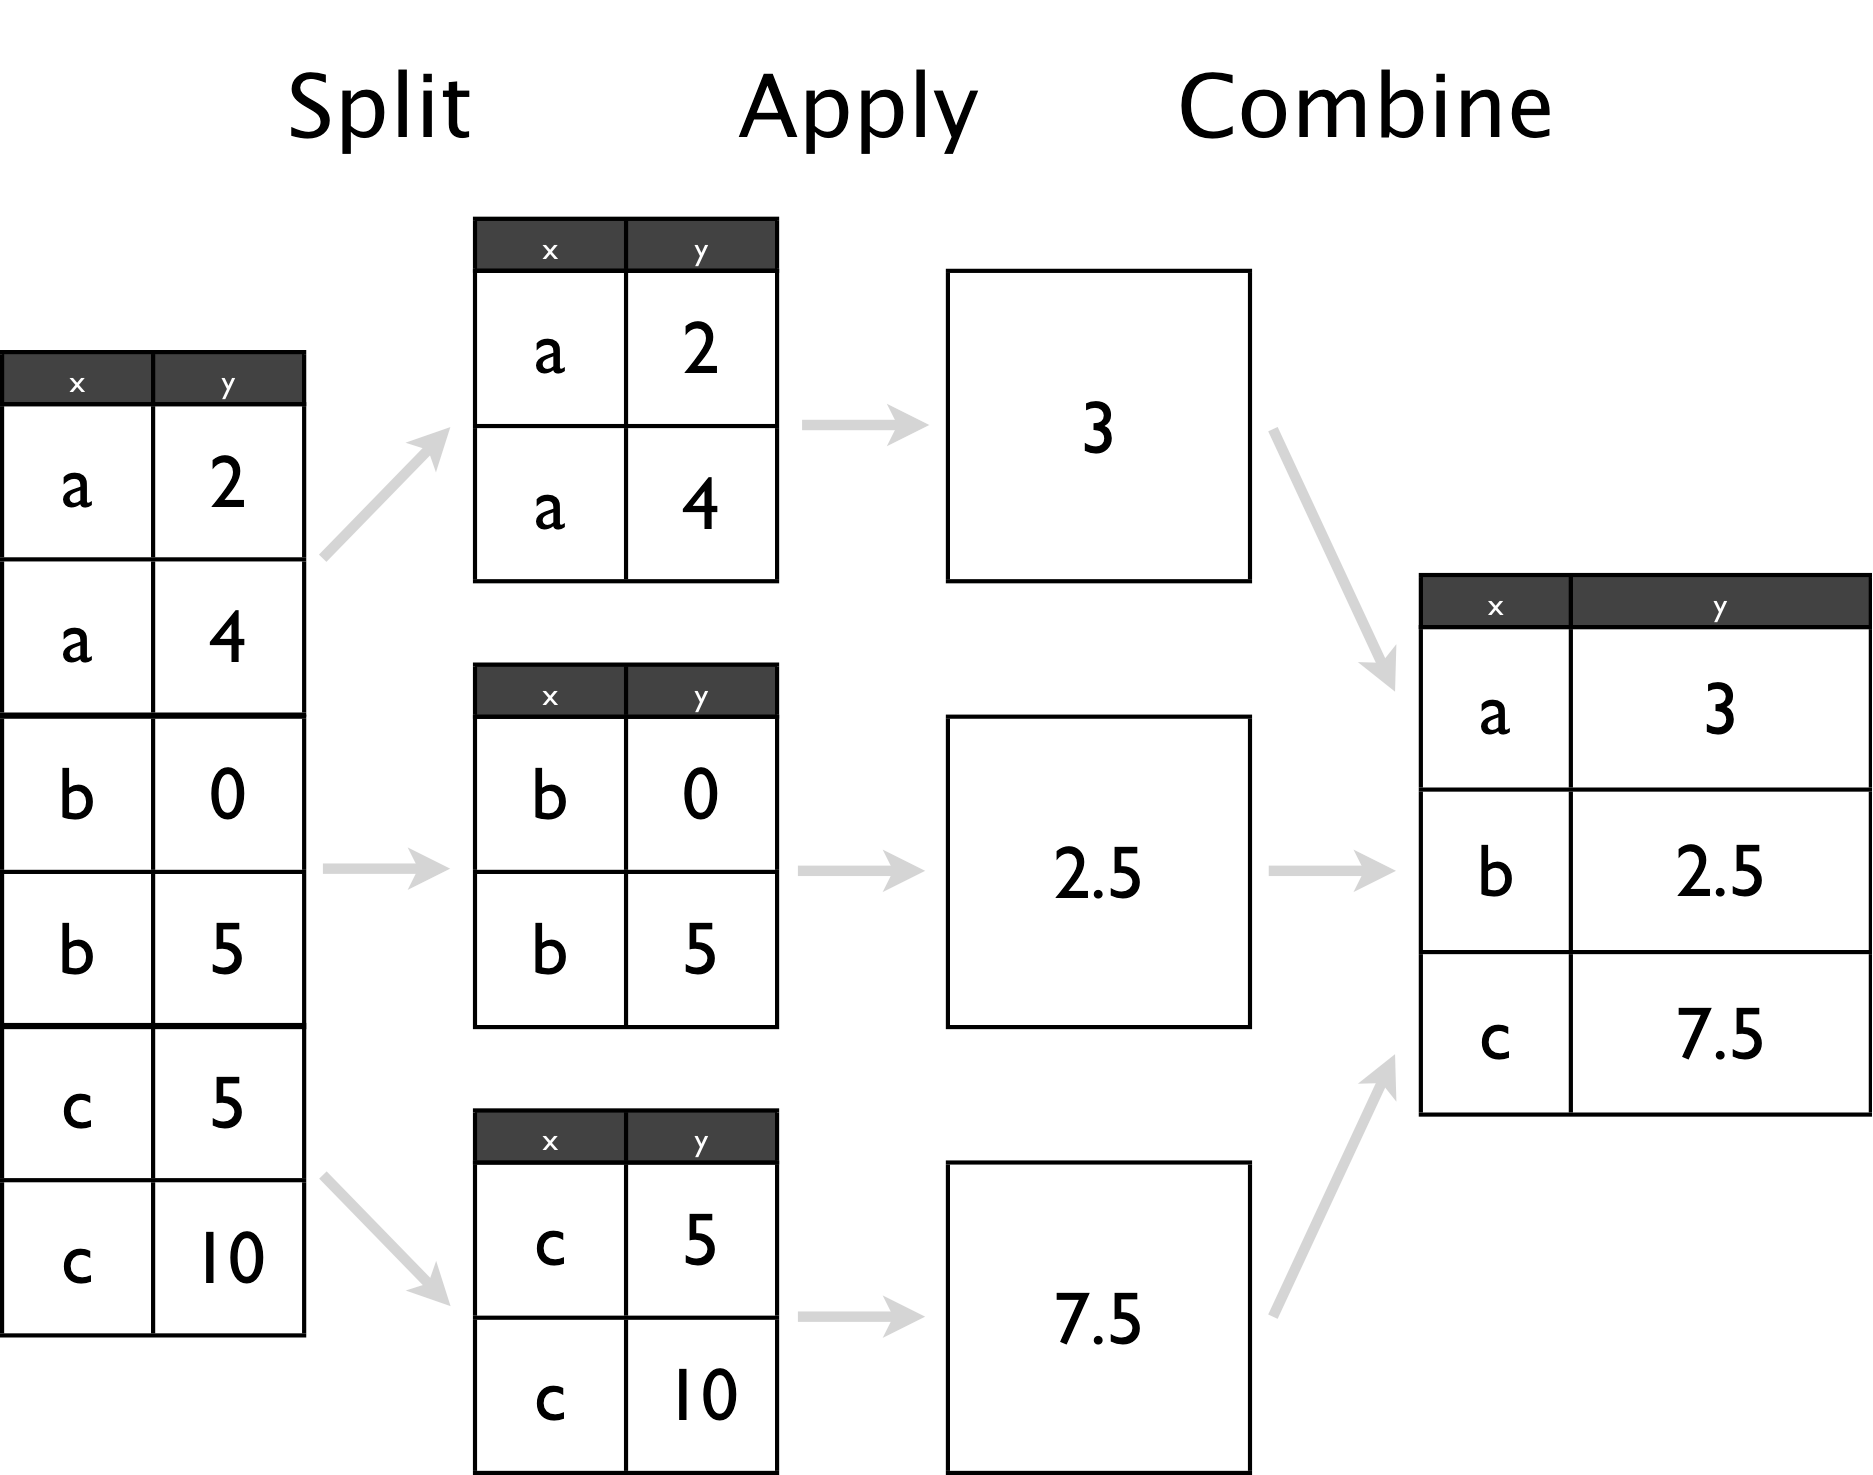

In [36]:
# группируем по значениям столбцов Sector и
group=data.groupby('Sector')
group.size() # считаем количество строк, оказавшихся в каждой группе

Sector
Advertising                                   2
Aerospace & Defense                          12
Agricultural & Farm Machinery                 1
Agricultural Products & Services              2
Air Freight & Logistics                       4
                                             ..
Tobacco                                       2
Trading Companies & Distributors              2
Transaction & Payment Processing Services     8
Water Utilities                               1
Wireless Telecommunication Services           1
Length: 127, dtype: int64

In [37]:
data.count()

Symbol            503
Name              503
Sector            503
Price             500
Price/Earnings    475
Dividend Yield    404
Earnings/Share    499
52 Week Low       500
52 Week High      500
Market Cap        500
EBITDA            470
Price/Sales       499
Price/Book        468
SEC Filings       503
dtype: int64

In [38]:
group.count() # число раз, когда значение группы встречалось
# может быть меньше, чем число строк, если значение было пропущено в файле

,Symbol,Name,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Sector,,,,,,,,,,,,,
Advertising,2,2,2,2,2,2,2,2,2,2,2,2,2
Aerospace & Defense,12,12,12,11,9,12,12,12,12,12,12,10,12
Agricultural & Farm Machinery,1,1,1,1,1,1,1,1,1,1,1,1,1
Agricultural Products & Services,2,2,2,2,2,2,2,2,2,2,2,2,2
Air Freight & Logistics,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobacco,2,2,2,2,2,2,2,2,2,2,2,0,2
Trading Companies & Distributors,2,2,2,2,2,2,2,2,2,2,2,2,2
Transaction & Payment Processing Services,8,8,8,8,5,8,8,8,8,8,8,8,8


In [39]:
#group.Price.median() # медиана для групп по числовому столбцу Price
# тут-то нам и пригодилось обращение к столбцу как к атрибуту

group['Price'].median() # альтернативное написание

Sector
Advertising                                   57.730
Aerospace & Defense                          207.790
Agricultural & Farm Machinery                476.560
Agricultural Products & Services              63.680
Air Freight & Logistics                      113.905
                                              ...   
Tobacco                                       91.215
Trading Companies & Distributors             415.650
Transaction & Payment Processing Services    195.065
Water Utilities                              124.640
Wireless Telecommunication Services          232.970
Name: Price, Length: 127, dtype: float64

In [40]:
data['Price'].median()

np.float64(122.19999999999999)

In [41]:
# каждую группу можно посмотреть, вот состав группы Materials
group.get_group('Advertising')

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
255,IPG,Interpublic Group of Companies (The),Advertising,28.67,13.523585,0.0460,2.12,26.30,35.17,1.068001e+10,1.732100e+09,1.143604,2.866427,http://www.sec.gov/cgi-bin/browse-edgar?action...
356,OMC,Omnicom Group,Advertising,86.79,11.856557,0.0324,7.32,81.42,107.00,1.705259e+10,2.420600e+09,1.105315,4.285291,http://www.sec.gov/cgi-bin/browse-edgar?action...


Уникальные (т.е. без повторов) названия (столбец Name) компаний в каждой группе.

In [42]:
group.Name.unique()

Sector
Advertising                                  [Interpublic Group of Companies (The), Omnicom...
Aerospace & Defense                          [Axon Enterprise, Boeing, GE Aerospace, Genera...
Agricultural & Farm Machinery                                                [Deere & Company]
Agricultural Products & Services                        [Archer Daniels Midland, Bunge Global]
Air Freight & Logistics                      [C.H. Robinson, Expeditors International, FedE...
                                                                   ...                        
Tobacco                                                  [Altria, Philip Morris International]
Trading Companies & Distributors                                    [Fastenal, United Rentals]
Transaction & Payment Processing Services    [Corpay, Fidelity National Information Service...
Water Utilities                                                         [American Water Works]
Wireless Telecommunication Services        

Каждая группа здесь это кортеж названий и содержания (последовательность) группы.

Посмотрим, есть ли в группе хоть одна фирма с аббревиатурой (столбец Symbol) начинающейся на букву "А".

In [43]:
letter="A"
for i in group.Symbol:
    print('{}: {}'.format(i[0],(i[1].str.get(0)==letter).any()))

Advertising: False
Aerospace & Defense: True
Agricultural & Farm Machinery: False
Agricultural Products & Services: True
Air Freight & Logistics: False
Apparel Retail: False
Apparel, Accessories & Luxury Goods: False
Application Software: True
Asset Management & Custody Banks: True
Automobile Manufacturers: False
Automotive Parts & Equipment: True
Automotive Retail: True
Biotechnology: True
Brewers: False
Broadcasting: False
Broadline Retail: True
Building Products: True
Cable & Satellite: False
Cargo Ground Transportation: False
Casinos & Gaming: False
Commodity Chemicals: False
Communications Equipment: True
Computer & Electronics Retail: False
Construction & Engineering: False
Construction Machinery & Heavy Transportation Equipment: False
Construction Materials: False
Consumer Electronics: False
Consumer Finance: True
Consumer Staples Merchandise Retail: False
Copper: False
Data Center REITs: False
Data Processing & Outsourced Services: False
Distillers & Vintners: False
Distributor

Что здесь происходит:
- группы можно итерировать, в цикле переменная i будет являться последовательно кортежем из названия и содержание каждой из групп в которой оставлен только столбец Symbol.
- i[0] - название группы, i[1] - содержимое текущей группы, в нашем случае это объект типа Series.
- у этого объекта Series есть атрибут str, который позволяет работать с элементами как со строкой.
- метод get() для строки возвращает символ строки на определенном месте, 0 - это первый символ.
- сравниваем этот первый символ с буквой "A", получаем или истину или ложь.
- так как в группе может быть не одна строка, то в результате получится логический вектор (тип Series) из значений истина\ложь.
- метод any() для логических векторов возвращает истину если хотя бы один элемент вектора истинный, что нам и требуется.
- наконец печатаем результат.



Агрегировать группы можно разными функциями, даже своими собственными, в этом помогает метод [`agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.agg.html?highlight=agg#pandas.core.groupby.GroupBy.agg), который позволяет применять одну или несколько функций к группам. Давайте сделаем свою функцию и применим ее к группам.

In [44]:
# своя функция, которая вычитает минимальное значение из максимального
def max_min(arr):
    return arr.max() - arr.min()

# считаем по группам для столбца Price свою функцию и среднее.
result=group.Price.agg([max_min, 'mean'])
result

,max_min,mean
Sector,,
Advertising,58.12,57.730000
Aerospace & Defense,1276.83,361.176667
Agricultural & Farm Machinery,0.00,476.560000
Agricultural Products & Services,24.90,63.680000
Air Freight & Logistics,165.38,148.042500
...,...,...
Tobacco,77.97,91.215000
Trading Companies & Distributors,684.82,415.650000
Transaction & Payment Processing Services,473.96,243.843750


## Разбивка на интервалы
Значения в столбце можно разбить на интервалы, назвать их и записать эти интервалы вместо значений. В этом поможет команда [`cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut) которой указываем что разбивать, сколько интервалов сделать, их названия и другие аргументы.

In [45]:
data['Price']

0      152.20
1       67.30
2      127.93
3      183.90
4      384.95
        ...  
498    124.04
499    130.50
500    391.94
501    109.48
502    170.90
Name: Price, Length: 503, dtype: float64

In [46]:
# разбиваем столбец Price на 5 интервалов, называем их.
cuted=pd.cut(data['Price'], 5,labels=['Low','Medium','High','Very High','Exclusive'], include_lowest=True)
cuted

0      Low
1      Low
2      Low
3      Low
4      Low
      ... 
498    Low
499    Low
500    Low
501    Low
502    Low
Name: Price, Length: 503, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Exclusive']

Заменим столбец Price на cuted

In [47]:
data['Price']=cuted
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M,Industrial Conglomerates,Low,21.286713,0.0199,7.15,75.652176,155.00,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A. O. Smith,Building Products,Low,18.539946,0.0196,3.63,66.760000,92.45,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care Equipment,Low,16.744764,0.0202,7.64,99.710000,129.85,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie,Biotechnology,Low,64.300700,0.0373,2.86,153.580000,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture,IT Consulting & Other Services,Low,32.294464,0.0170,11.92,278.690000,387.51,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrial Machinery & Supplies & Components,Low,35.643677,0.0118,3.48,112.020000,146.08,3.013490e+10,1.689000e+09,3.577267,2.845411,http://www.sec.gov/cgi-bin/browse-edgar?action...
499,YUM,Yum! Brands,Restaurants,Low,24.392525,0.0205,5.35,122.130000,143.20,3.641890e+10,2.608000e+09,5.042073,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
500,ZBRA,Zebra Technologies,Electronic Equipment & Instruments,Low,53.397820,NaN,7.34,237.060000,427.76,2.021626e+10,8.030000e+08,4.341981,5.905112,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,ZBH,Zimmer Biomet,Health Care Equipment,Low,20.893131,0.0087,5.24,100.670000,133.90,2.179462e+10,2.557400e+09,2.869412,1.765892,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [48]:
data['Price111']='Нечто'

In [49]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Price111
0,MMM,3M,Industrial Conglomerates,Low,21.286713,0.0199,7.15,75.652176,155.00,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...,Нечто
1,AOS,A. O. Smith,Building Products,Low,18.539946,0.0196,3.63,66.760000,92.45,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...,Нечто
2,ABT,Abbott Laboratories,Health Care Equipment,Low,16.744764,0.0202,7.64,99.710000,129.85,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...,Нечто
3,ABBV,AbbVie,Biotechnology,Low,64.300700,0.0373,2.86,153.580000,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...,Нечто
4,ACN,Accenture,IT Consulting & Other Services,Low,32.294464,0.0170,11.92,278.690000,387.51,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...,Нечто


В качестве упражнения выведите на экран название (Name) фирмы, у которой цена (Price) входит в интервал Exclusive

In [50]:
data[data['Price']=='Exclusive']['Name']


351    NVR, Inc.
Name: Name, dtype: object

# Задания
Тщательно изучите документацию на библиотеку pandas и попробуйте самостоятельно выполнить группировку по другим столбцам.

# Ссылки

https://pythonru.com/biblioteki/struktury-dannyh-v-pandas